In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data=pd.read_csv('F:\\data_science\\dataquest\\train_DaEJRFg.csv')
test_data=pd.read_csv('F:\\data_science\\dataquest\\test_TQDFDgg.csv')
train_data.tail()

victim_id incident_time incident_date  \
11772  VIC20120001118366      23:15:02    13-06-2012   
11773  VIC20110000320257      00:15:02    03-03-2011   
11774  VIC20090001341524      20:52:35    18-07-2009   
11775  VIC20140000744614      06:51:15    23-06-2014   
11776  VIC20100000952321      16:51:39    09-05-2010   

                incident_location incident_tehsil  \
11772  Sanjay Colony--Patel Nagar          Raipur   
11773         Shartradhar Crosing          Raipur   
11774                   Ramsawala        Sahaspur   
11775                 Majri Grant         Doiwala   
11776                Shimla Chowk          Raipur   

                cause_of_emergency  base_to_scene_distance  \
11772  Multiple Vehicular Incident                       4   
11773          2 Wheeler accidents                       1   
11774          2 Wheeler accidents                      25   
11775  Multiple Vehicular Incident                       8   
11776       Vehicle role over/Skid                       8   

       scene_to_hospital_distance roadway_feature road_type surrounding_area  \
11772                           3             CUR       HIW              HIL   
11773                           2             CUR       HIW              AGL   
11774                          22             INT       HIW             HOSP   
11775                           8             UNK       LOC              AGL   
11776                           3             INT       HIW              MAR   

       criticality  
11772            0  
11773            0  
11774            0  
11775            1  
11776            0

In [4]:
d=train_data['incident_date']+' '+train_data['incident_time']
train_data['datetime']=pd.to_datetime(d)

In [5]:
del train_data['incident_date']
del train_data['incident_time']

In [6]:
train_data['year']=train_data['datetime'].dt.year
train_data['hour']=train_data['datetime'].dt.hour
train_data['month']=train_data['datetime'].dt.month
train_data['weekday']=train_data['datetime'].dt.dayofweek
train_data['day']=train_data['datetime'].dt.day

### Visualisations

In [7]:
import seaborn as sns

In [7]:
crtical=train_data[train_data['criticality']==1]['criticality'].groupby(train_data['datetime'].dt.hour).count()
non_crtical=train_data[train_data['criticality']==0]['criticality'].groupby(train_data['datetime'].dt.hour).count()
total_users=train_data['criticality'].groupby(train_data['hour']).count()

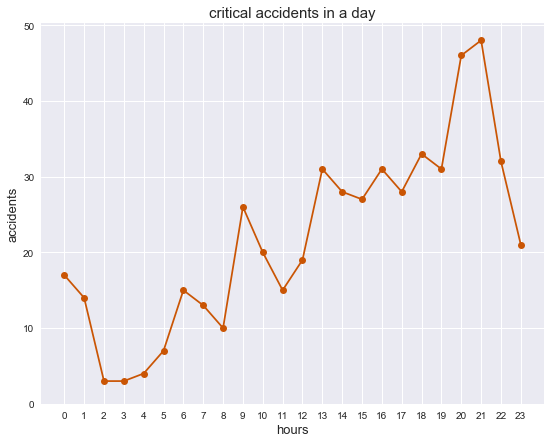

In [8]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(24)
ax.plot(d,crtical,'-o',color='#CA5504',label='crtical')
ax.set_xlabel('hours',fontsize=13)
ax.set_ylabel('accidents',fontsize=13)
ax.set_title('critical accidents in a day',fontsize=15)
ax.set_yticks(range(0,60,10))
ax.set_xticks(range(24))

#plt.legend(fontsize=12)
plt.show()

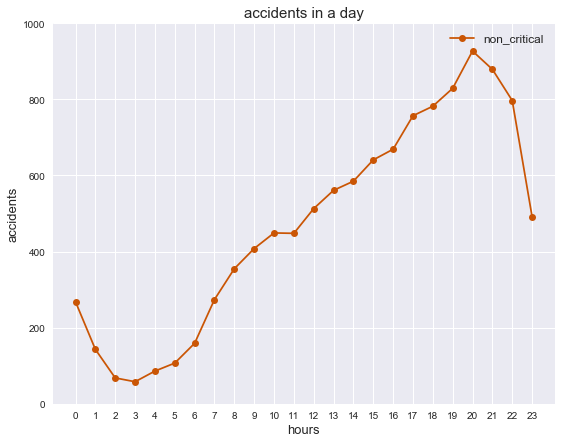

In [9]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(24)
ax.plot(d,non_crtical,'-o',color='#CA5504',label='non_critical')
ax.set_xlabel('hours',fontsize=13)
ax.set_ylabel('accidents',fontsize=13)
ax.set_title('accidents in a day',fontsize=15)
ax.set_yticks(range(0,1200,200))
ax.set_xticks(range(24))

plt.legend(fontsize=12)
plt.show()

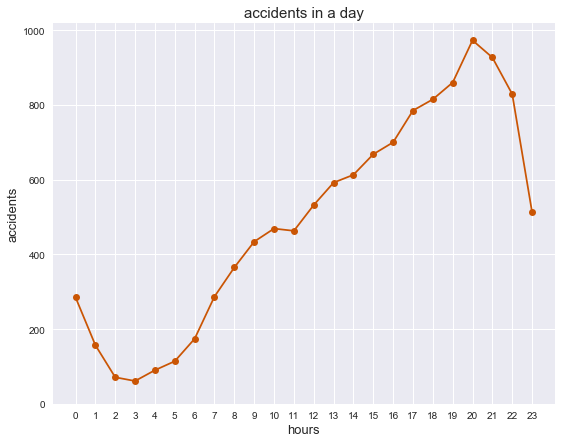

In [10]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(24)
ax.plot(d,total_users,'-o',color='#CA5504',label='total')
ax.set_xlabel('hours',fontsize=13)
ax.set_ylabel('accidents',fontsize=13)
ax.set_title('accidents in a day',fontsize=15)
ax.set_yticks(range(0,1200,200))
ax.set_xticks(range(24))

#plt.legend(fontsize=12,loc='best')
plt.show()

In [85]:
critical=train_data[train_data['criticality']==1]['criticality'].groupby(train_data['year']).count()
non_critical=train_data[train_data['criticality']==0]['criticality'].groupby(train_data['year']).count()
total_users=train_data['criticality'].groupby(train_data['year']).mean()

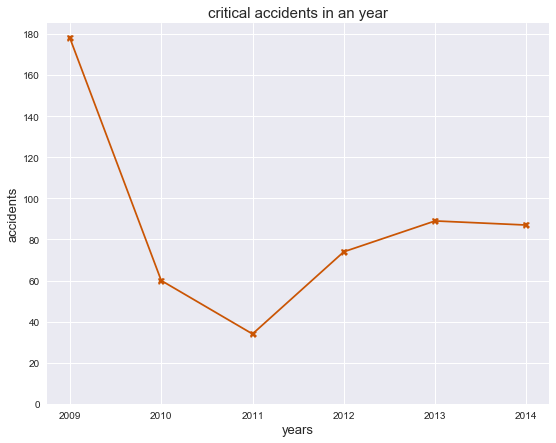

In [12]:
fig,ax=plt.subplots(figsize=(9,7))
d=[2009,2010,2011,2012,2013,2014]
ax.plot(d,critical,'-X',color='#CA5504',label='critical')
ax.set_xlabel('years',fontsize=13)
ax.set_ylabel('accidents',fontsize=13)
ax.set_title('critical accidents in an year',fontsize=15)
ax.set_yticks(range(0,200,20))
ax.set_xticks([2009,2010,2011,2012,2013,2014])

#plt.legend(fontsize=12,loc='best')
plt.show()

In [13]:
sns.set_context(context='talk')
sns.set_style(style='darkgrid')

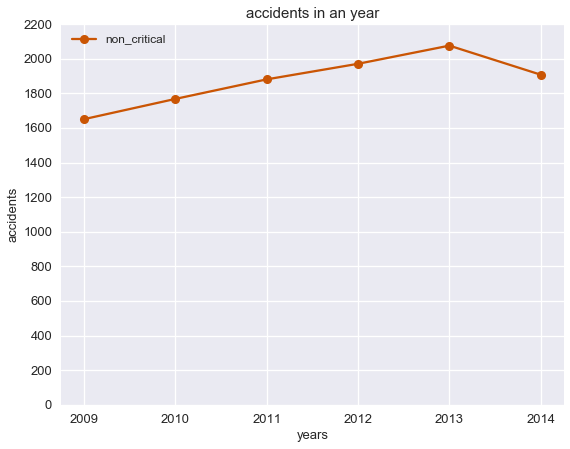

In [14]:
fig,ax=plt.subplots(figsize=(9,7))
d=[2009,2010,2011,2012,2013,2014]
ax.plot(d,non_critical,'-o',color='#CA5504',label='non_critical')
ax.set_xlabel('years',fontsize=13)
ax.set_ylabel('accidents',fontsize=13)
ax.set_title('accidents in an year',fontsize=15)
ax.set_yticks(range(0,2400,200))
ax.set_xticks([2009,2010,2011,2012,2013,2014])

plt.legend(fontsize=12,loc='best')
plt.show()

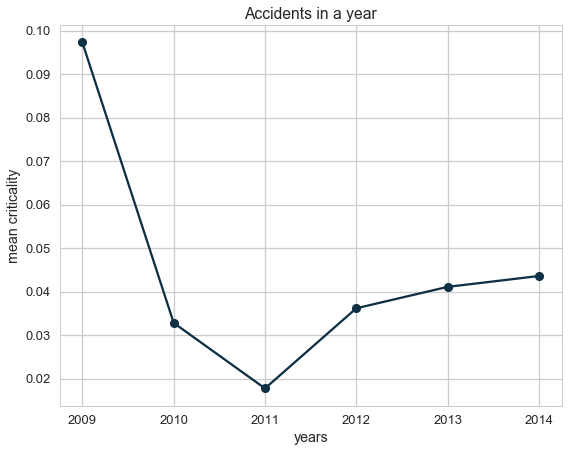

In [89]:
fig,ax=plt.subplots(figsize=(9,7))
d=[2009,2010,2011,2012,2013,2014]
ax.plot(d,total_users,'-o',color='#0e2f44',label='total')
ax.set_xlabel('years')
ax.set_ylabel('mean criticality')
ax.set_title('Accidents in a year')
#ax.set_yticks(range(0,2600,200))
ax.set_xticks([2009,2010,2011,2012,2013,2014])

#plt.legend(fontsize=12,loc='best')
plt.show()

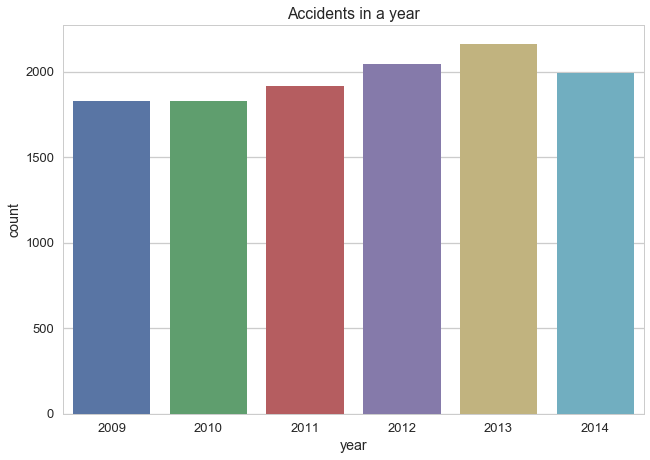

In [88]:
sns.set_context(context='talk')
sns.set_style(style='whitegrid')
g=sns.countplot(x='year',hue=None,data=train_data);
g.set_title('Accidents in a year')

### month

In [17]:
critical=train_data[train_data['criticality']==1]['criticality'].groupby(train_data['month']).count()
non_critical=train_data[train_data['criticality']==0]['criticality'].groupby(train_data['month']).count()
total_users=train_data['criticality'].groupby(train_data['month']).count()

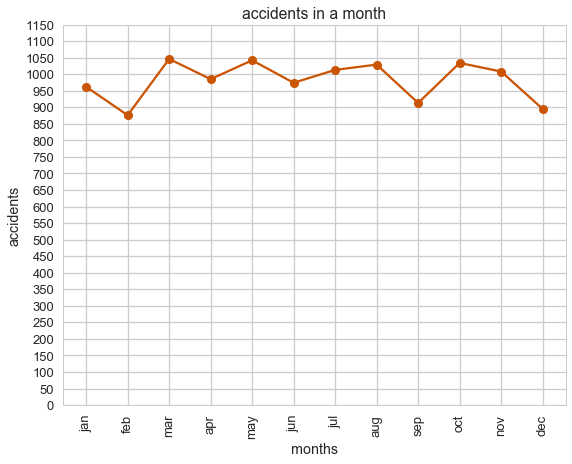

In [18]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(1,13)
ax.plot(d,total_users,'-o',color='#CA5504',label='total')
ax.set_xlabel('months')
ax.set_ylabel('accidents')
ax.set_title('accidents in a month')
ax.set_yticks(range(0,1200,50))
ax.set_xticks(range(1,13))
ax.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],rotation=90)

#plt.legend(loc='best')
plt.show()

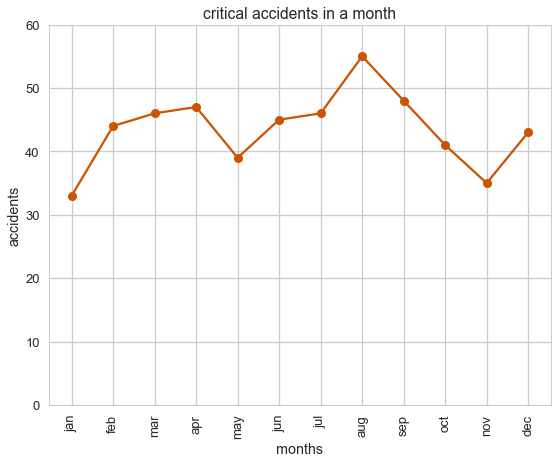

In [19]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(1,13)
ax.plot(d,critical,'-o',color='#CA5504',label='crictical')
ax.set_xlabel('months')
ax.set_ylabel('accidents')
ax.set_title('critical accidents in a month')
ax.set_yticks(range(0,70,10))
ax.set_xticks(range(1,13))
ax.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],rotation=90)

#plt.legend(fontsize=12,loc='best')
plt.show()

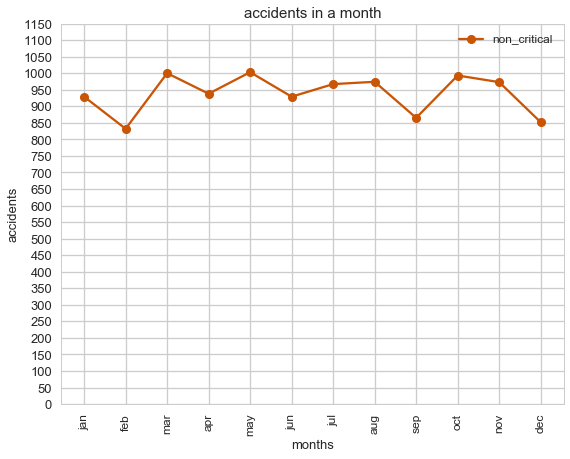

In [20]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(1,13)
ax.plot(d,non_critical,'-o',color='#CA5504',label='non_critical')
ax.set_xlabel('months',fontsize=13)
ax.set_ylabel('accidents',fontsize=13)
ax.set_title('accidents in a month',fontsize=15)
ax.set_yticks(range(0,1200,50))
ax.set_xticks(range(1,13))
ax.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],rotation=90,fontsize=12)

plt.legend(fontsize=12,loc='best')
plt.show()

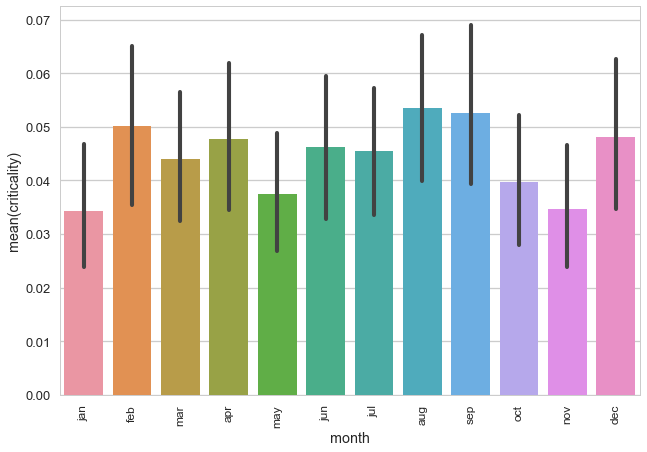

In [21]:
g=sns.barplot(x='month',y='criticality',hue=None,data=train_data);
g.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],rotation=90,fontsize=12);

### weekday

In [22]:
critical=train_data[train_data['criticality']==1]['criticality'].groupby(train_data['weekday']).count()
non_critical=train_data[train_data['criticality']==0]['criticality'].groupby(train_data['weekday']).count()
total_users=train_data['criticality'].groupby(train_data['weekday']).count()

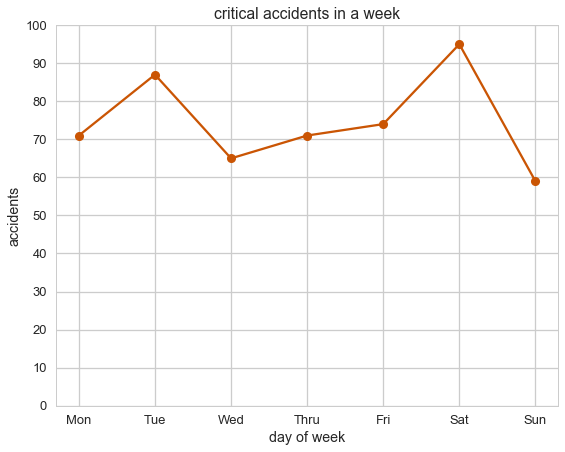

In [23]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(7)
ax.plot(d,critical,'-o',color='#CA5504',label='critical')
ax.set_xlabel('day of week')
ax.set_ylabel('accidents')
ax.set_title('critical accidents in a week')
ax.set_yticks(range(0,110,10))
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun'])

#plt.legend(fontsize=12,loc='best')
plt.show()

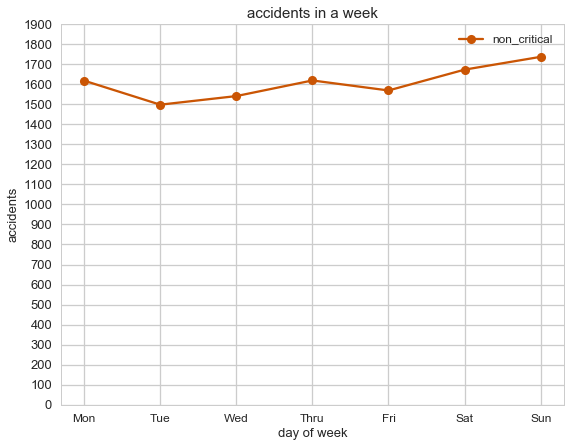

In [24]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(7)
ax.plot(d,non_critical,'-o',color='#CA5504',label='non_critical')
ax.set_xlabel('day of week',fontsize=13)
ax.set_ylabel('accidents',fontsize=13)
ax.set_title('accidents in a week',fontsize=15)
ax.set_yticks(range(0,2000,100))
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun'],fontsize=12)

plt.legend(fontsize=12,loc='best')
plt.show()

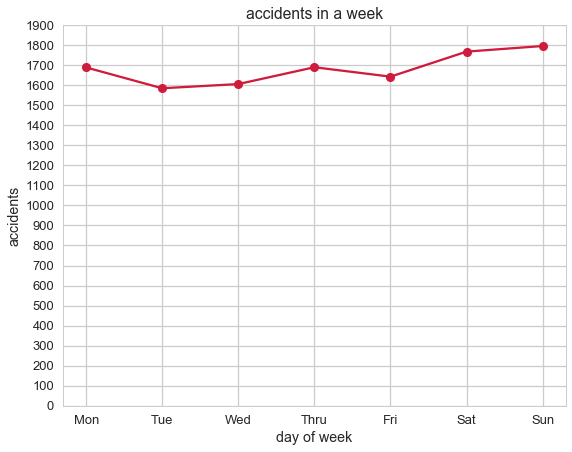

In [25]:
fig,ax=plt.subplots(figsize=(9,7))
d=np.arange(7)
ax.plot(d,total_users,'-o',color='#CF1B3C',label='total')
ax.set_xlabel('day of week')
ax.set_ylabel('accidents')
ax.set_title('accidents in a week')
ax.set_yticks(range(0,2000,100))
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun'])

#plt.legend(fontsize=12,loc='best')
plt.show()

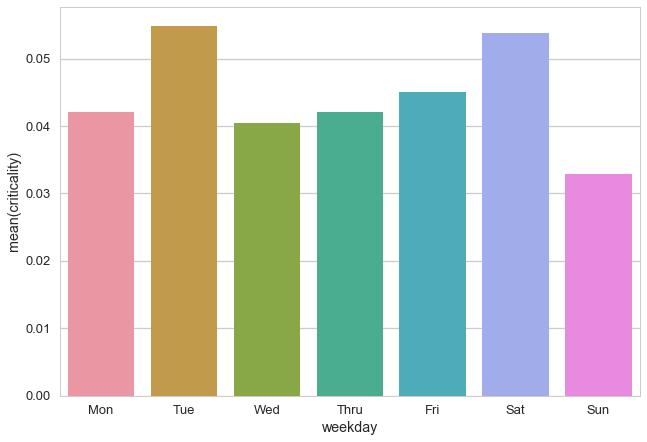

In [26]:
ax=sns.barplot(x='weekday',y='criticality',hue=None,data=train_data,ci=None);
ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun']);

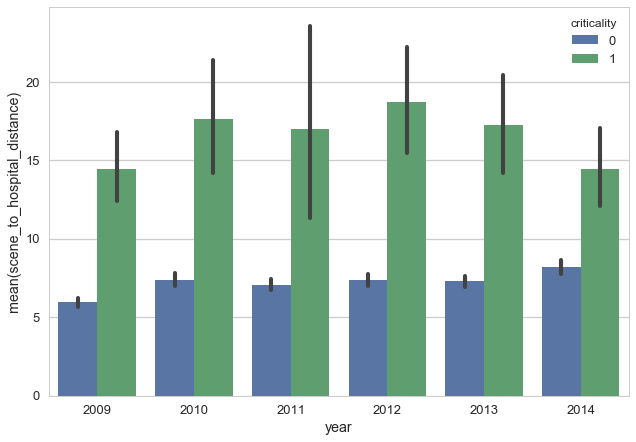

In [27]:
sns.barplot(x='year',y='scene_to_hospital_distance',hue='criticality',data=train_data);

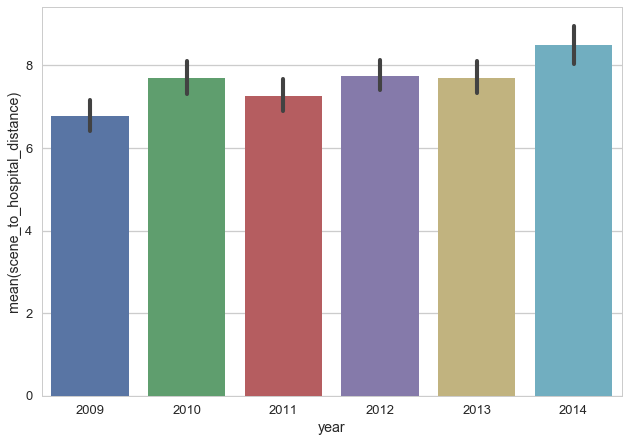

In [28]:
sns.barplot(x='year',y='scene_to_hospital_distance',hue=None,data=train_data);

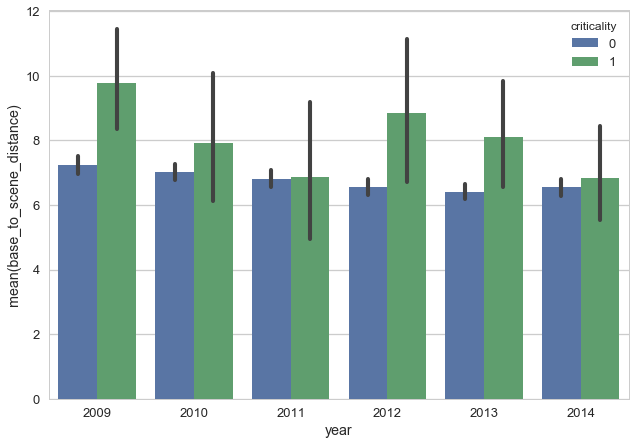

In [29]:
sns.barplot(x='year',y='base_to_scene_distance',hue='criticality',data=train_data);

In [30]:
train_data['criticality'].groupby(train_data['scene_to_hospital_distance']).count()

scene_to_hospital_distance
0      1509
1       905
2       967
3       973
4      1002
5       917
6       737
7       617
8       525
9       458
10      398
11      327
12      313
13      264
14      222
15      188
16      168
17      126
18      116
19      103
20      101
21       84
22       61
23       64
24       56
25       62
26       66
27       57
28       30
29       30
       ... 
56        1
57        3
58        4
59        3
60        6
61        3
62        3
64        1
65        1
67        2
68        1
69        1
71        1
72        2
74        1
76        1
78        3
80        2
81        1
82        1
83        1
85        3
86        1
89        1
92        1
96        1
97        1
100       1
107       1
119       1
Name: criticality, Length: 86, dtype: int64

In [31]:
train_data['criticality'].groupby(train_data['scene_to_hospital_distance']).mean()

scene_to_hospital_distance
0      0.000000
1      0.025414
2      0.022751
3      0.019527
4      0.022954
5      0.032715
6      0.024423
7      0.042139
8      0.059048
9      0.050218
10     0.050251
11     0.061162
12     0.060703
13     0.075758
14     0.076577
15     0.106383
16     0.083333
17     0.119048
18     0.086207
19     0.126214
20     0.089109
21     0.083333
22     0.131148
23     0.093750
24     0.160714
25     0.112903
26     0.075758
27     0.140351
28     0.266667
29     0.200000
         ...   
56     0.000000
57     0.666667
58     0.250000
59     0.666667
60     0.333333
61     0.333333
62     0.000000
64     0.000000
65     0.000000
67     0.500000
68     0.000000
69     0.000000
71     0.000000
72     0.000000
74     1.000000
76     0.000000
78     0.000000
80     0.000000
81     0.000000
82     0.000000
83     1.000000
85     0.333333
86     0.000000
89     1.000000
92     1.000000
96     0.000000
97     1.000000
100    0.000000
107    0.000000
119    0.0000

In [32]:
d=train_data['criticality'].groupby(train_data['scene_to_hospital_distance']).count()

In [33]:
d1=d.index

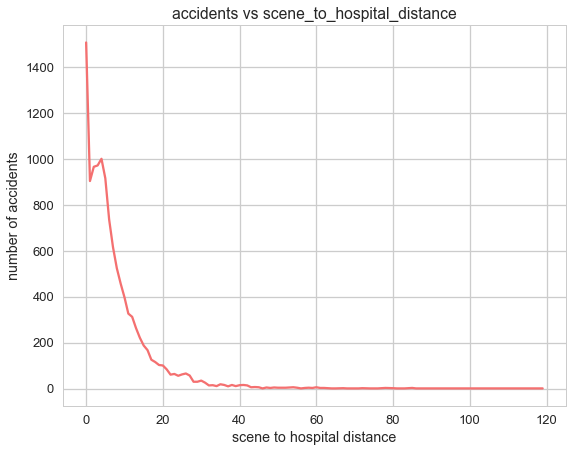

In [34]:
fig,ax=plt.subplots(figsize=(9,7))
#d=np.arange(7)
ax.plot(d1,d,'-',color='#f47070')
ax.set_xlabel('scene to hospital distance')
ax.set_ylabel('number of accidents')
ax.set_title('accidents vs scene_to_hospital_distance')
#ax.set_yticks(range(0,2000,100))
#ax.set_xticks(range(7))
#ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun'],fontsize=12)

#plt.legend(fontsize=12,loc='best')
plt.show()

In [35]:
d=train_data['criticality'].groupby(train_data['scene_to_hospital_distance']).mean()[:20]
d1=d.index[:20]

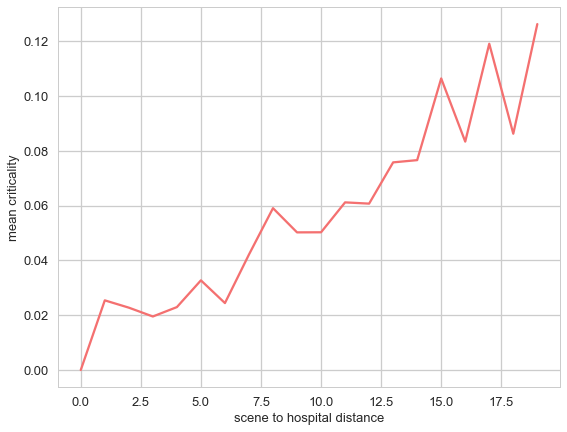

In [36]:
fig,ax=plt.subplots(figsize=(9,7))
#d=np.arange(7)
ax.plot(d1,d,color='#f47070')
ax.set_xlabel('scene to hospital distance',fontsize=13)
ax.set_ylabel('mean criticality',fontsize=13)
#ax.set_title('',fontsize=15)
#ax.set_yticks(range(0,2000,100))
#ax.set_xticks(range(20))
#ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun'],fontsize=12)

#plt.legend(fontsize=12,loc='best')
plt.show()

In [37]:
d=train_data['criticality'].groupby(train_data['base_to_scene_distance']).mean()[:20]
d1=d.index[:20]

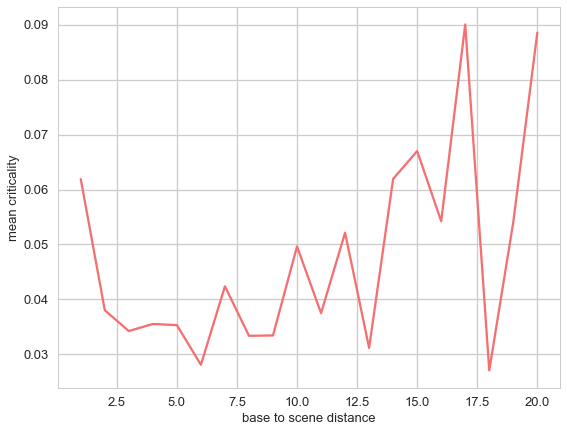

In [38]:
fig,ax=plt.subplots(figsize=(9,7))
#d=np.arange(7)
ax.plot(d1,d,color='#f47070')
ax.set_xlabel('base to scene distance',fontsize=13)
ax.set_ylabel('mean criticality',fontsize=13)
#ax.set_title('',fontsize=15)
#ax.set_yticks(range(0,2000,100))
#ax.set_xticks(range(20))
#ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun'],fontsize=12)

#plt.legend(fontsize=12,loc='best')
plt.show()

In [39]:
d=train_data['criticality'].groupby(train_data['base_to_scene_distance']).count()
d1=d.index

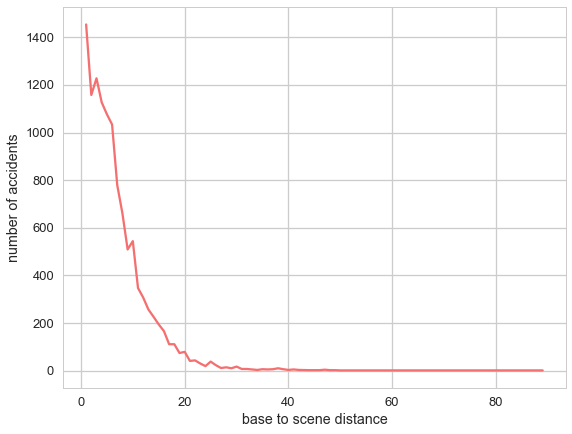

In [40]:
fig,ax=plt.subplots(figsize=(9,7))
#d=np.arange(7)
ax.plot(d1,d,color='#f47070')
ax.set_xlabel('base to scene distance')
ax.set_ylabel('number of accidents')
#ax.set_title('',fontsize=15)
#ax.set_yticks(range(0,2000,100))
#ax.set_xticks(range(20))
#ax.set_xticklabels(['Mon','Tue','Wed','Thru','Fri','Sat','Sun'],fontsize=12)

#plt.legend(fontsize=12,loc='best')
plt.show()

In [41]:
train_data.columns

Index(['victim_id', 'incident_location', 'incident_tehsil',
       'cause_of_emergency', 'base_to_scene_distance',
       'scene_to_hospital_distance', 'roadway_feature', 'road_type',
       'surrounding_area', 'criticality', 'datetime', 'year', 'hour', 'month',
       'weekday', 'day'],
      dtype='object')

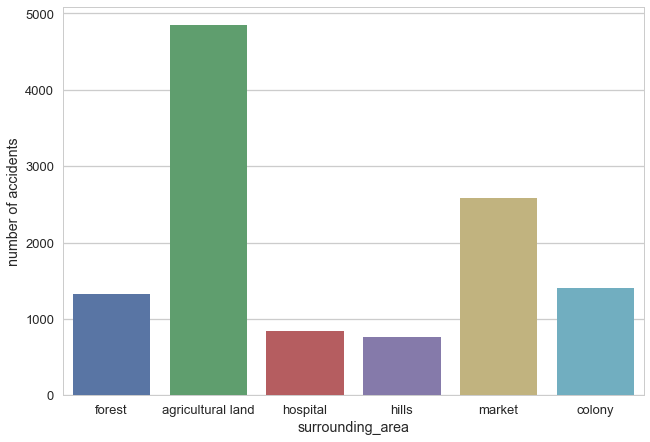

In [42]:
g=sns.countplot(x='surrounding_area',data=train_data)
g.set_xticklabels(['forest','agricultural land','hospital','hills','market','colony']);
g.set_ylabel('number of accidents');

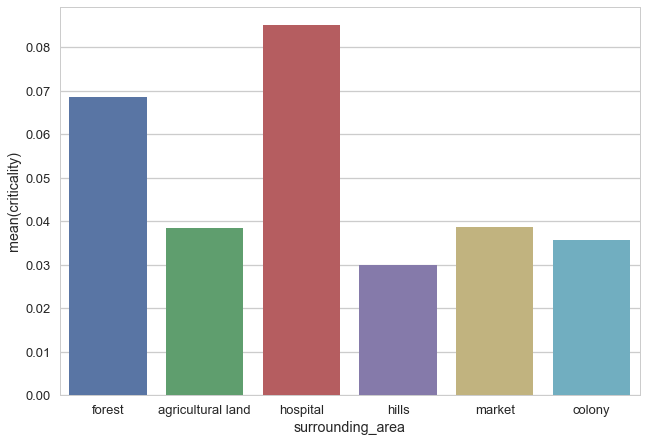

In [43]:
g=sns.barplot(x='surrounding_area',y='criticality',data=train_data,ci=None)
g.set_xticklabels(['forest','agricultural land','hospital','hills','market','colony']);

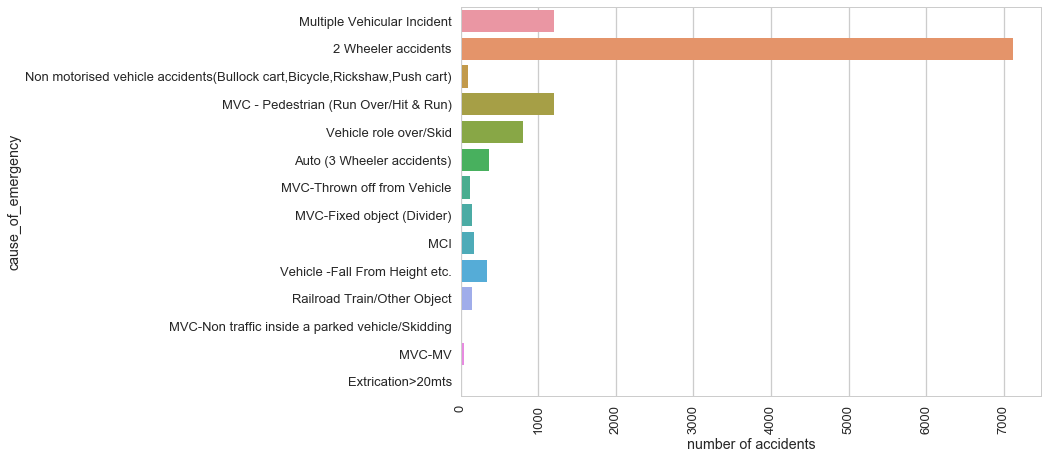

In [44]:
g=sns.countplot(y='cause_of_emergency',data=train_data);
plt.xticks(rotation=90);
g.set_xlabel('number of accidents')

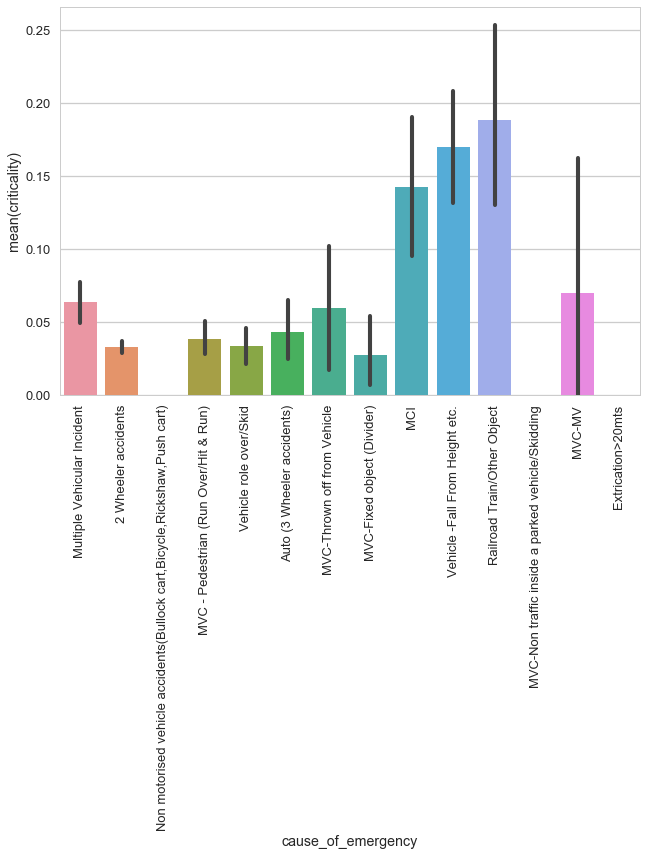

In [45]:
g=sns.barplot(x='cause_of_emergency',y='criticality',data=train_data);
plt.xticks(rotation=90);

In [46]:
train_data[train_data['weekday']==6]['criticality'].groupby(train_data['incident_tehsil']).mean()#sunday

incident_tehsil
Chakrata      0.068966
Dehradun      0.127660
Doiwala       0.046154
Kalsi         0.125000
Raipur        0.016927
Sahaspur      0.030471
Vikasnagar    0.033333
Name: criticality, dtype: float64

In [47]:
train_data[train_data['weekday']==6]['criticality'].groupby(train_data['incident_tehsil']).count()#sunday

incident_tehsil
Chakrata       29
Dehradun       47
Doiwala       455
Kalsi          16
Raipur        768
Sahaspur      361
Vikasnagar    120
Name: criticality, dtype: int64

In [48]:
train_data[train_data['weekday']==5]['criticality'].groupby(train_data['incident_tehsil']).mean()#saturday

incident_tehsil
Chakrata      0.066667
Dehradun      0.035714
Doiwala       0.066937
Kalsi         0.200000
Raipur        0.046875
Sahaspur      0.044248
Vikasnagar    0.053435
Name: criticality, dtype: float64

In [49]:
train_data[train_data['weekday']==5]['criticality'].groupby(train_data['incident_tehsil']).count()#saturday

incident_tehsil
Chakrata       30
Dehradun       56
Doiwala       493
Kalsi          15
Raipur        704
Sahaspur      339
Vikasnagar    131
Name: criticality, dtype: int64

In [50]:
train_data.groupby(train_data['incident_tehsil']).count()

victim_id  incident_location  cause_of_emergency  \
incident_tehsil                                                     
Chakrata               199                190                 199   
Dehradun               315                308                 315   
Doiwala               3185               3096                3185   
Kalsi                   77                 75                  77   
Raipur                4794               4675                4794   
Sahaspur              2320               2258                2320   
Vikasnagar             887                868                 887   

                 base_to_scene_distance  scene_to_hospital_distance  \
incident_tehsil                                                       
Chakrata                            199                         199   
Dehradun                            315                         315   
Doiwala                            3185                        3185   
Kalsi                                77                          77   
Raipur                             4794                        4794   
Sahaspur                           2320                        2320   
Vikasnagar                          887                         887   

                 roadway_feature  road_type  surrounding_area  criticality  \
incident_tehsil                                                              
Chakrata                     199        199               199          199   
Dehradun                     315        315               315          315   
Doiwala                     3185       3185              3185         3185   
Kalsi                         77         77                77           77   
Raipur                      4794       4794              4794         4794   
Sahaspur                    2320       2320              2320         2320   
Vikasnagar                   887        887               887          887   

                 datetime  year  hour  month  weekday   day  
incident_tehsil                                              
Chakrata              199   199   199    199      199   199  
Dehradun              315   315   315    315      315   315  
Doiwala              3185  3185  3185   3185     3185  3185  
Kalsi                  77    77    77     77       77    77  
Raipur               4794  4794  4794   4794     4794  4794  
Sahaspur             2320  2320  2320   2320     2320  2320  
Vikasnagar            887   887   887    887      887   887

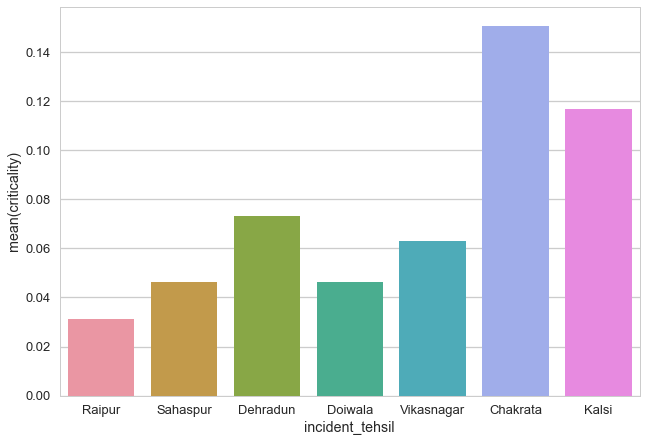

In [51]:
sns.barplot(x='incident_tehsil',y='criticality',data=train_data,ci=None);

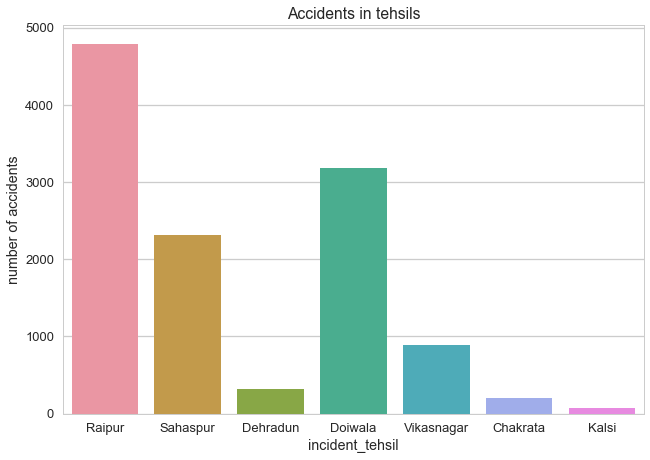

In [90]:
g=sns.countplot(x='incident_tehsil',data=train_data);
g.set_title('Accidents in tehsils')
g.set_ylabel('number of accidents');

In [52]:
pd.crosstab(train_data['cause_of_emergency'],train_data['incident_tehsil'])

incident_tehsil                                     Chakrata  Dehradun  \
cause_of_emergency                                                       
2 Wheeler accidents                                       64       222   
Auto (3 Wheeler accidents)                                 5         7   
Extrication>20mts                                          0         0   
MCI                                                        8         8   
MVC - Pedestrian (Run Over/Hit & Run)                      8        25   
MVC-Fixed object (Divider)                                 0         4   
MVC-MV                                                     2         6   
MVC-Non traffic inside a parked vehicle/Skidding           0         0   
MVC-Thrown off from Vehicle                               12         2   
Multiple Vehicular Incident                               22        20   
Non motorised vehicle accidents(Bullock cart,Bi...         0         1   
Railroad Train/Other Object                                1         1   
Vehicle -Fall From Height etc.                            57         5   
Vehicle role over/Skid                                    20        14   

incident_tehsil                                     Doiwala  Kalsi  Raipur  \
cause_of_emergency                                                           
2 Wheeler accidents                                    1848     29    2993   
Auto (3 Wheeler accidents)                              159      2     142   
Extrication>20mts                                         2      0       9   
MCI                                                      47      4      35   
MVC - Pedestrian (Run Over/Hit & Run)                   270      2     587   
MVC-Fixed object (Divider)                               35      1      63   
MVC-MV                                                   23      0       7   
MVC-Non traffic inside a parked vehicle/Skidding          6      0       9   
MVC-Thrown off from Vehicle                              14      1      42   
Multiple Vehicular Incident                             427      6     381   
Non motorised vehicle accidents(Bullock cart,Bi...       14      0      50   
Railroad Train/Other Object                              89      0      47   
Vehicle -Fall From Height etc.                           39     24      81   
Vehicle role over/Skid                                  212      8     348   

incident_tehsil                                     Sahaspur  Vikasnagar  
cause_of_emergency                                                        
2 Wheeler accidents                                     1431         540  
Auto (3 Wheeler accidents)                                45           7  
Extrication>20mts                                          3           0  
MCI                                                       41          25  
MVC - Pedestrian (Run Over/Hit & Run)                    227          79  
MVC-Fixed object (Divider)                                30          14  
MVC-MV                                                     3           2  
MVC-Non traffic inside a parked vehicle/Skidding           0           2  
MVC-Thrown off from Vehicle                               29          17  
Multiple Vehicular Incident                              257          83  
Non motorised vehicle accidents(Bullock cart,Bi...        20          12  
Railroad Train/Other Object                                0           0  
Vehicle -Fall From Height etc.                           101          34  
Vehicle role over/Skid                                   133          72

In [53]:
pd.crosstab(train_data[train_data['criticality']==1]['cause_of_emergency'],train_data[train_data['criticality']==1]['incident_tehsil'])

incident_tehsil                        Chakrata  Dehradun  Doiwala  Kalsi  \
cause_of_emergency                                                          
2 Wheeler accidents                           7        14       66      1   
Auto (3 Wheeler accidents)                    0         2       11      0   
MCI                                           1         2        6      1   
MVC - Pedestrian (Run Over/Hit & Run)         2         1       10      0   
MVC-Fixed object (Divider)                    0         0        2      0   
MVC-MV                                        0         0        2      0   
MVC-Thrown off from Vehicle                   2         0        3      0   
Multiple Vehicular Incident                   3         2       28      0   
Railroad Train/Other Object                   0         1       12      0   
Vehicle -Fall From Height etc.               12         0        3      7   
Vehicle role over/Skid                        3         1        5      0   

incident_tehsil                        Raipur  Sahaspur  Vikasnagar  
cause_of_emergency                                                   
2 Wheeler accidents                        74        51          22  
Auto (3 Wheeler accidents)                  2         1           0  
MCI                                         2        10           2  
MVC - Pedestrian (Run Over/Hit & Run)      17         7           9  
MVC-Fixed object (Divider)                  1         1           0  
MVC-MV                                      1         0           0  
MVC-Thrown off from Vehicle                 2         0           0  
Multiple Vehicular Incident                18        16           9  
Railroad Train/Other Object                13         0           0  
Vehicle -Fall From Height etc.             11        14          11  
Vehicle role over/Skid                      8         7           3

In [54]:
pd.crosstab(train_data['cause_of_emergency'],train_data['incident_tehsil'],values=train_data['criticality'],aggfunc=np.mean)

incident_tehsil                                     Chakrata  Dehradun  \
cause_of_emergency                                                       
2 Wheeler accidents                                 0.109375  0.063063   
Auto (3 Wheeler accidents)                          0.000000  0.285714   
Extrication>20mts                                        NaN       NaN   
MCI                                                 0.125000  0.250000   
MVC - Pedestrian (Run Over/Hit & Run)               0.250000  0.040000   
MVC-Fixed object (Divider)                               NaN  0.000000   
MVC-MV                                              0.000000  0.000000   
MVC-Non traffic inside a parked vehicle/Skidding         NaN       NaN   
MVC-Thrown off from Vehicle                         0.166667  0.000000   
Multiple Vehicular Incident                         0.136364  0.100000   
Non motorised vehicle accidents(Bullock cart,Bi...       NaN  0.000000   
Railroad Train/Other Object                         0.000000  1.000000   
Vehicle -Fall From Height etc.                      0.210526  0.000000   
Vehicle role over/Skid                              0.150000  0.071429   

incident_tehsil                                      Doiwala     Kalsi  \
cause_of_emergency                                                       
2 Wheeler accidents                                 0.035714  0.034483   
Auto (3 Wheeler accidents)                          0.069182  0.000000   
Extrication>20mts                                   0.000000       NaN   
MCI                                                 0.127660  0.250000   
MVC - Pedestrian (Run Over/Hit & Run)               0.037037  0.000000   
MVC-Fixed object (Divider)                          0.057143  0.000000   
MVC-MV                                              0.086957       NaN   
MVC-Non traffic inside a parked vehicle/Skidding    0.000000       NaN   
MVC-Thrown off from Vehicle                         0.214286  0.000000   
Multiple Vehicular Incident                         0.065574  0.000000   
Non motorised vehicle accidents(Bullock cart,Bi...  0.000000       NaN   
Railroad Train/Other Object                         0.134831       NaN   
Vehicle -Fall From Height etc.                      0.076923  0.291667   
Vehicle role over/Skid                              0.023585  0.000000   

incident_tehsil                                       Raipur  Sahaspur  \
cause_of_emergency                                                       
2 Wheeler accidents                                 0.024724  0.035639   
Auto (3 Wheeler accidents)                          0.014085  0.022222   
Extrication>20mts                                   0.000000  0.000000   
MCI                                                 0.057143  0.243902   
MVC - Pedestrian (Run Over/Hit & Run)               0.028961  0.030837   
MVC-Fixed object (Divider)                          0.015873  0.033333   
MVC-MV                                              0.142857  0.000000   
MVC-Non traffic inside a parked vehicle/Skidding    0.000000       NaN   
MVC-Thrown off from Vehicle                         0.047619  0.000000   
Multiple Vehicular Incident                         0.047244  0.062257   
Non motorised vehicle accidents(Bullock cart,Bi...  0.000000  0.000000   
Railroad Train/Other Object                         0.276596       NaN   
Vehicle -Fall From Height etc.                      0.135802  0.138614   
Vehicle role over/Skid                              0.022989  0.052632   

incident_tehsil                                     Vikasnagar  
cause_of_emergency                                              
2 Wheeler accidents                                   0.040741  
Auto (3 Wheeler accidents)                            0.000000  
Extrication>20mts                                          NaN  
MCI                                                   0.080000  
MVC - Pedestrian (Run Over/Hit & Run)                 0

In [55]:
data=pd.crosstab(train_data['incident_location'],train_data['incident_tehsil'])

In [56]:
data['locations']=data.index

In [57]:
data.index=range(len(data))

In [58]:
data.head()

incident_tehsil  Chakrata  Dehradun  Doiwala  Kalsi  Raipur  Sahaspur  \
0                       0         0        1      0       0         0   
1                       0         0        0      0       1         0   
2                       0         0        0      0       1         0   
3                       0         0        0      0       1         0   
4                       0         0        0      0       1         0   

incident_tehsil  Vikasnagar                                   locations  
0                         0                     (Ahead) Mani Mai Mandir  
1                         0  , 26Panchil Park Ahead From Ballupur Chowk  
2                         0   , Baniyawala , Telpur 3 Km From Premnagar  
3                         0             ,, 10 Steps Frm Transport Nagar  
4                         0                                   ,Dhrampur

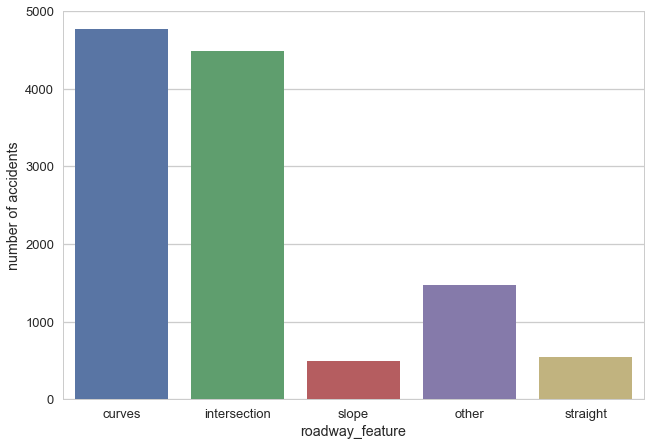

In [81]:
g=sns.countplot(x='roadway_feature',data=train_data);
g.set_ylabel('number of accidents');
g.set_xticklabels(['curves','intersection','slope','other','straight']);

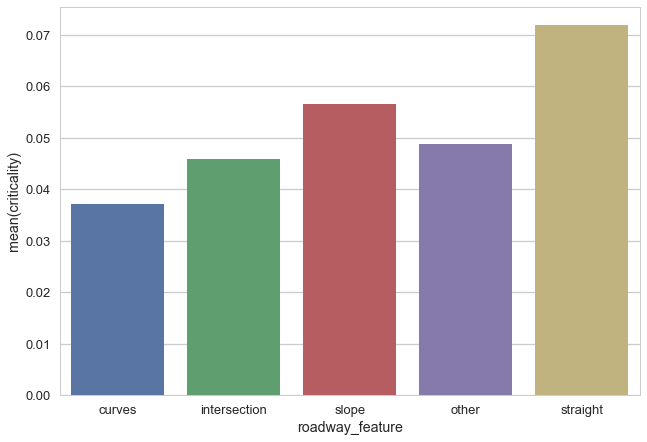

In [83]:
g=sns.barplot(x='roadway_feature',y='criticality',data=train_data,ci=None);
g.set_xticklabels(['curves','intersection','slope','other','straight']);

In [61]:
pd.crosstab(train_data['surrounding_area'],train_data['roadway_feature'])

roadway_feature    CUR   INT  SLP  STR   UNK
surrounding_area                            
AGL               2923     8   65  385  1466
COL                  0  1401    0    0     0
FOR               1044     0  142  139     0
HIL                732     0    9   16    11
HOSP                51   792    0    3     0
MAR                 19  2291  280    0     0

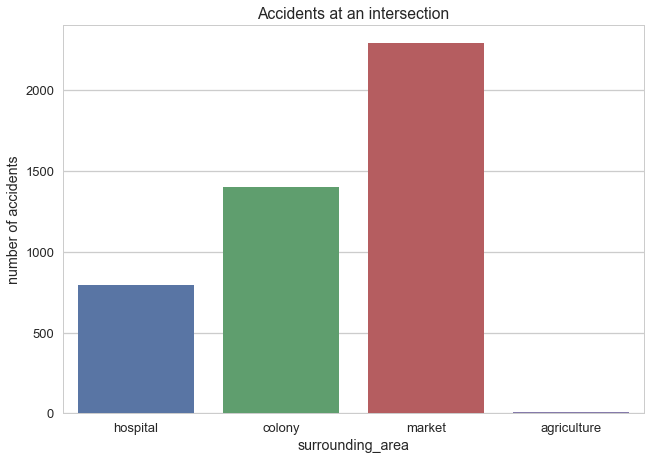

In [77]:
g=sns.countplot(x=train_data[train_data['roadway_feature']=='INT']['surrounding_area'],data=train_data);
g.set_title('Accidents at an intersection')
g.set_ylabel('number of accidents')
g.set_xticklabels(['hospital','colony','market','agriculture','forest','hill'])

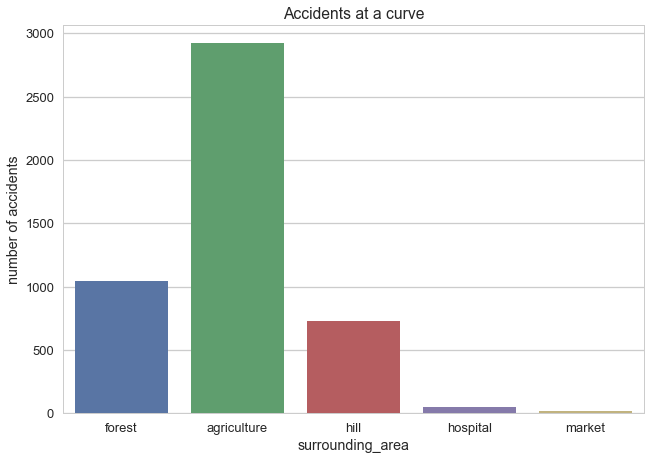

In [79]:
g1=sns.countplot(x=train_data[train_data['roadway_feature']=='CUR']['surrounding_area'],data=train_data);
g1.set_title('Accidents at a curve')
g1.set_ylabel('number of accidents')
g1.set_xticklabels(['forest','agriculture','hill','hospital','market']);

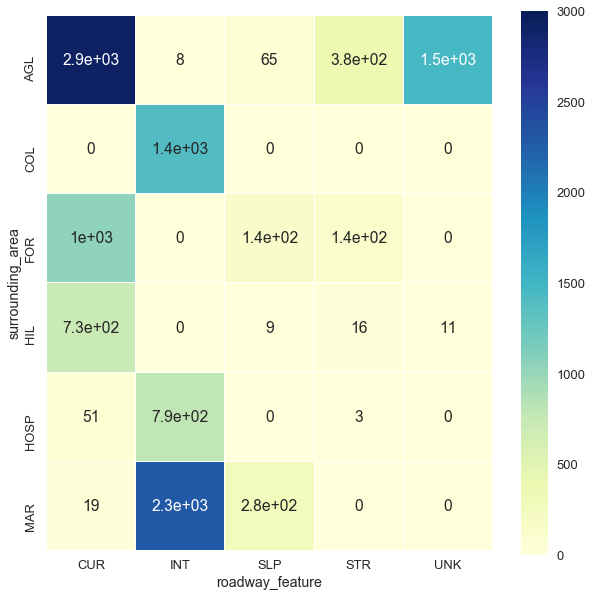

In [62]:
tab=pd.crosstab(train_data['surrounding_area'],train_data['roadway_feature'])
plt.figure(figsize=(10, 10))

sns.heatmap(tab, vmax=3000, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
#plt.title('');

In [63]:
pd.crosstab(train_data['surrounding_area'],train_data['roadway_feature'],values=train_data['criticality'],aggfunc=np.mean)

roadway_feature        CUR       INT       SLP       STR       UNK
surrounding_area                                                  
AGL               0.028738  0.000000  0.092308  0.062338  0.049113
COL                    NaN  0.035689       NaN       NaN       NaN
FOR               0.065134       NaN  0.056338  0.107914       NaN
HIL               0.031421       NaN  0.000000  0.000000  0.000000
HOSP              0.039216  0.088384       NaN  0.000000       NaN
MAR               0.000000  0.037538  0.050000       NaN       NaN

In [64]:
pd.crosstab(train_data['surrounding_area'],train_data['month'],values=train_data['criticality'],aggfunc=np.mean)

month                   1         2         3         4         5         6   \
surrounding_area                                                               
AGL               0.031447  0.048571  0.037895  0.044619  0.025862  0.046414   
COL               0.025641  0.045872  0.038674  0.032895  0.050000  0.020408   
FOR               0.074074  0.074766  0.123457  0.055046  0.063670  0.077295   
HIL               0.029412  0.041667  0.030928  0.049645  0.000000  0.032520   
HOSP              0.040541  0.089286  0.000000  0.081633  0.045455  0.100000   
MAR               0.035928  0.032967  0.047337  0.052288  0.055118  0.009009   

month                   7         8         9         10        11        12  
surrounding_area                                                              
AGL               0.025974  0.043478  0.031830  0.037647  0.036789  0.054441  
COL               0.040000  0.058824  0.056911  0.015544  0.032653  0.057692  
FOR               0.075949  0.060000  0.069767  0.059701  0.075472  0.042424  
HIL               0.000000  0.030769  0.076923  0.000000  0.000000  0.040000  
HOSP              0.136842  0.127820  0.128440  0.081818  0.031250  0.058824  
MAR               0.039578  0.038348  0.036458  0.040541  0.030534  0.041812

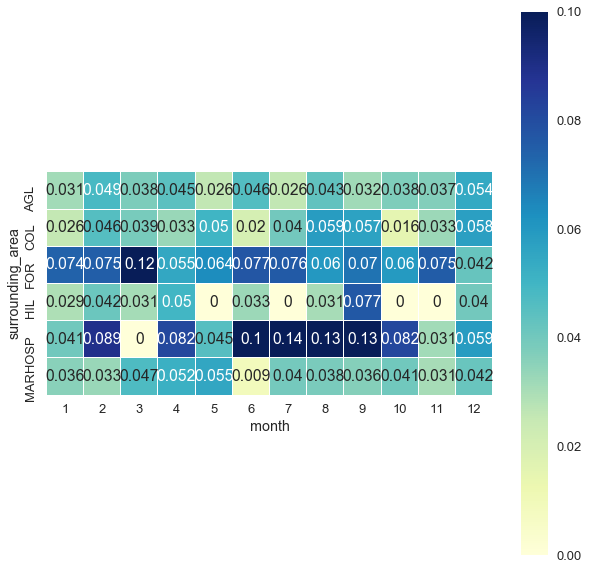

In [65]:
tab=pd.crosstab(train_data['surrounding_area'],train_data['month'],values=train_data['criticality'],aggfunc=np.mean)
plt.figure(figsize=(10, 10))

sns.heatmap(tab, vmax=0.1, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
#plt.title('');

In [66]:
pd.crosstab(train_data['surrounding_area'],train_data['month'])

month              1    2    3    4    5    6    7    8    9    10   11   12
surrounding_area                                                            
AGL               477  350  475  381  464  474  385  391  377  425  299  349
COL               156  109  181  152   40   49   50   51  123  193  245   52
FOR                54  107   81  109  267  207   79   50   86   67   53  165
HIL                34   72   97  141  122  123   25   65   26   17   21   25
HOSP               74   56   43   49   22   10   95  133  109  110  128   17
MAR               167  182  169  153  127  111  379  339  192  222  262  287

In [67]:
pd.crosstab(train_data['roadway_feature'],train_data['month'])

month             1    2    3    4    5    6    7    8    9    10   11   12
roadway_feature                                                            
CUR              459  462  378  385  583  608  271  320  281  323  281  418
INT              372  327  337  343  169  153  501  477  356  506  608  343
SLP               49   23  106   58   16   25   33   48   72   19   32   15
STR               39   24   99   23  113   26   20   35   36   22   34   72
UNK               43   40  126  176  161  162  188  149  168  164   53   47

In [68]:
pd.crosstab(train_data['road_type'],train_data['month'])

month       1    2    3    4    5    6    7    8    9    10   11   12
road_type                                                            
HIW        633  589  831  692  770  690  672  699  465  588  559  652
LOC        329  287  215  293  272  284  341  330  448  446  449  243

In [69]:
pd.crosstab(train_data['road_type'],train_data['roadway_feature'])

roadway_feature   CUR   INT  SLP  STR   UNK
road_type                                  
HIW              4158  2770  389  519     4
LOC               611  1722  107   24  1473

In [220]:
pd.crosstab(train_data['road_type'],train_data['roadway_feature'],values=train_data['criticality'],aggfunc=np.mean)

roadway_feature       CUR       INT       SLP       STR      UNK
road_type                                                       
HIW              0.037759  0.046570  0.051414  0.075145  0.00000
LOC              0.032733  0.044715  0.074766  0.000000  0.04888

In [125]:
pd.crosstab(train_data['scene_to_hospital_distance'],train_data['roadway_feature'],values=train_data['criticality'],aggfunc=np.mean)

roadway_feature                  CUR       INT       SLP       STR       UNK
scene_to_hospital_distance                                                  
0                           0.000000  0.000000  0.000000  0.000000  0.000000
1                           0.022785  0.031700  0.000000  0.034483  0.019608
2                           0.017032  0.026810  0.027778  0.019231  0.031579
3                           0.012821  0.025316  0.023810  0.021277  0.020202
4                           0.024943  0.019774  0.052632  0.000000  0.023810
5                           0.017094  0.035714  0.093023  0.051282  0.041667
6                           0.026936  0.025000  0.000000  0.058824  0.011364
7                           0.028340  0.048980  0.043478  0.136364  0.037500
8                           0.058252  0.041451  0.050000  0.166667  0.065789
9                           0.036458  0.054878  0.050000  0.040000  0.087719
10                          0.019355  0.060606  0.176471  0.117647  0.045455
11                          0.029851  0.076923  0.076923  0.115385  0.081081
12                          0.073826  0.048077  0.000000  0.333333  0.023810
13                          0.049020  0.089109  0.142857  0.000000  0.100000
14                          0.067416  0.105882  0.000000  0.111111  0.037037
15                          0.090909  0.093750  0.375000  0.000000  0.148148
16                          0.060606  0.050847  0.222222  0.666667  0.035714
17                          0.125000  0.127660  0.142857  0.000000  0.105263
18                          0.042553  0.097561  0.000000  0.125000  0.176471
19                          0.121212  0.128205  0.333333  0.000000  0.100000
20                          0.125000  0.081081  0.000000  0.000000  0.062500
21                          0.100000  0.100000  0.000000  0.000000  0.062500
22                          0.045455  0.208333  0.000000  0.000000  0.181818
23                          0.136364  0.076923       NaN       NaN  0.062500
24                          0.095238  0.062500  0.250000  1.000000  0.230769
25                          0.130435  0.074074  0.200000  0.000000  0.166667
26                          0.033333  0.055556  0.200000  0.500000  0.090909
27                          0.125000  0.111111  0.000000  1.000000  0.333333
28                          0.266667  0.571429  0.000000  0.000000  0.000000
29                          0.250000  0.181818  0.000000  0.000000  0.285714
...                              ...       ...       ...       ...       ...
56                               NaN  0.000000       NaN       NaN       NaN
57                          0.500000  1.000000       NaN       NaN       NaN
58                               NaN  1.000000       NaN  0.000000  0.000000
59                               NaN  0.666667       NaN       NaN       NaN
60                          1.000000  0.333333       NaN       NaN  0.000000
61                          0.000000  1.000000       NaN       NaN       NaN
62                          0.000000  0.000000       NaN       NaN       NaN
64                          0.000000       NaN       NaN       NaN       NaN
65                               NaN       NaN       NaN       NaN  0.000000
67                          0.000000       NaN       NaN  1.000000       NaN
68                          0.000000       NaN       NaN       NaN       NaN
69                          0.000000       NaN       NaN       NaN       NaN
71                          0.000000       NaN       NaN       NaN       NaN
72                               NaN  0.000000       NaN       NaN  0.000000
74                          1.000000       NaN       NaN       NaN       NaN
76                          0.000000       NaN       NaN       NaN       NaN
78                          0.000000       NaN       NaN       NaN       NaN
80                               NaN  0.000000       NaN       NaN       NaN
81                               NaN  0.000000       NaN       NaN       

In [115]:
pd.crosstab(train_data['cause_of_emergency'],train_data['roadway_feature'])

roadway_feature                                      CUR   INT  SLP  STR  UNK
cause_of_emergency                                                           
2 Wheeler accidents                                 2887  2781  293  325  841
Auto (3 Wheeler accidents)                           154   142   23   16   32
Extrication>20mts                                      9     3    0    0    2
MCI                                                   87    49   10   13    9
MVC - Pedestrian (Run Over/Hit & Run)                477   430   51   32  208
MVC-Fixed object (Divider)                            56    56    7    8   20
MVC-MV                                                14    22    1    6    0
MVC-Non traffic inside a parked vehicle/Skidding       7     6    2    0    2
MVC-Thrown off from Vehicle                           43    40    5    2   27
Multiple Vehicular Incident                          507   447   48   58  136
Non motorised vehicle accidents(Bullock cart,Bi...    37    39    3    9    9
Railroad Train/Other Object                           46    45    6    3   38
Vehicle -Fall From Height etc.                       142   120   15   17   47
Vehicle role over/Skid                               303   312   32   54  106

In [116]:
pd.crosstab(train_data['cause_of_emergency'],train_data['roadway_feature'],values=train_data['criticality'],aggfunc=np.mean)

roadway_feature                                          CUR       INT  \
cause_of_emergency                                                       
2 Wheeler accidents                                 0.027364  0.035239   
Auto (3 Wheeler accidents)                          0.032468  0.049296   
Extrication>20mts                                   0.000000  0.000000   
MCI                                                 0.172414  0.081633   
MVC - Pedestrian (Run Over/Hit & Run)               0.027254  0.041860   
MVC-Fixed object (Divider)                          0.053571  0.017857   
MVC-MV                                              0.071429  0.045455   
MVC-Non traffic inside a parked vehicle/Skidding    0.000000  0.000000   
MVC-Thrown off from Vehicle                         0.046512  0.050000   
Multiple Vehicular Incident                         0.049310  0.071588   
Non motorised vehicle accidents(Bullock cart,Bi...  0.000000  0.000000   
Railroad Train/Other Object                         0.173913  0.133333   
Vehicle -Fall From Height etc.                      0.126761  0.216667   
Vehicle role over/Skid                              0.026403  0.035256   

roadway_feature                                          SLP       STR  \
cause_of_emergency                                                       
2 Wheeler accidents                                 0.047782  0.061538   
Auto (3 Wheeler accidents)                          0.043478  0.187500   
Extrication>20mts                                        NaN       NaN   
MCI                                                 0.100000  0.230769   
MVC - Pedestrian (Run Over/Hit & Run)               0.019608  0.093750   
MVC-Fixed object (Divider)                          0.000000  0.000000   
MVC-MV                                              0.000000  0.166667   
MVC-Non traffic inside a parked vehicle/Skidding    0.000000       NaN   
MVC-Thrown off from Vehicle                         0.200000  0.000000   
Multiple Vehicular Incident                         0.083333  0.034483   
Non motorised vehicle accidents(Bullock cart,Bi...  0.000000  0.000000   
Railroad Train/Other Object                         0.333333  0.333333   
Vehicle -Fall From Height etc.                      0.066667  0.176471   
Vehicle role over/Skid                              0.093750  0.055556   

roadway_feature                                          UNK  
cause_of_emergency                                            
2 Wheeler accidents                                 0.028537  
Auto (3 Wheeler accidents)                          0.000000  
Extrication>20mts                                   0.000000  
MCI                                                 0.111111  
MVC - Pedestrian (Run Over/Hit & Run)               0.052885  
MVC-Fixed object (Divider)                          0.000000  
MVC-MV                                                   NaN  
MVC-Non traffic inside a parked vehicle/Skidding    0.000000  
MVC-Thrown off from Vehicle                         0.074074  
Multiple Vehicular Incident                         0.095588  
Non motorised vehicle accidents(Bullock cart,Bi...  0.000000  
Railroad Train/Other Object                         0.236842  
Vehicle -Fall From Height etc.                      0.212766  
Vehicle role over/Skid                              0.018868

In [28]:
critical=train_data[train_data['criticality']==1]['criticality'].groupby(train_data['incident_tehsil']).count()
non_critical=train_data[train_data['criticality']==0]['criticality'].groupby(train_data['incident_tehsil']).count()
total_users=train_data['criticality'].groupby(train_data['incident_tehsil']).count()

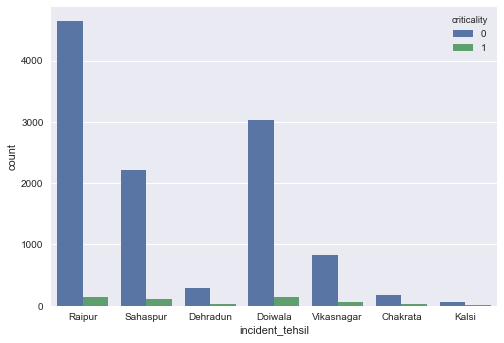

In [30]:
sns.countplot(x='incident_tehsil',hue='criticality',data=train_data);

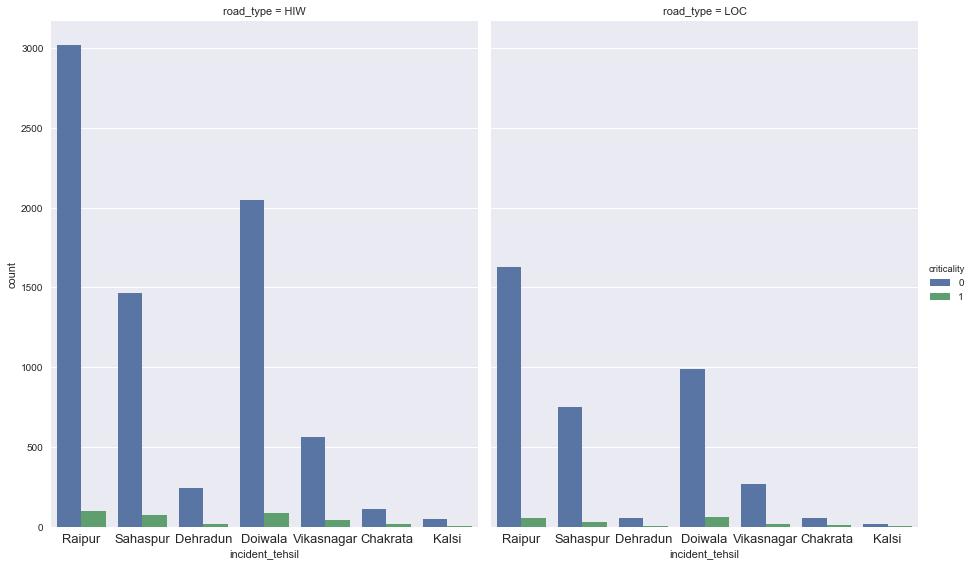

In [31]:
g = sns.factorplot(x="incident_tehsil", hue="criticality", col="road_type",
            data=train_data, kind="count",
                 size=8, aspect=0.8);
g.set_xticklabels(fontsize=13);

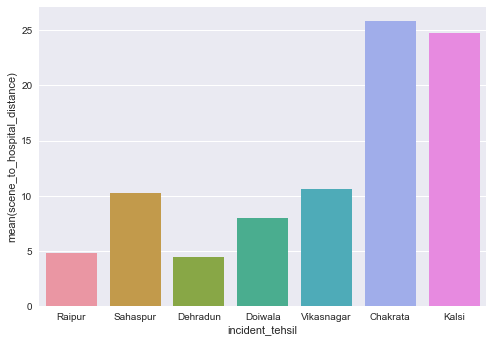

In [9]:
sns.barplot(x='incident_tehsil',y='scene_to_hospital_distance',data=train_data,ci=None);